### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
import tensorflow as tf
tf.set_random_seed(42)


In [28]:
tf.__version__

'1.13.1'

### Collect Data

In [0]:
import keras

In [0]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [31]:
print(testY[0:5])

[9 2 1 1 6]


In [32]:
trainX.shape

(60000, 28, 28)

In [33]:
import numpy as np
np.unique(trainY)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [35]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
('First 5 examples now are: ', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))


## Visualize the data

Plot first 10 images in the triaining set and their labels.

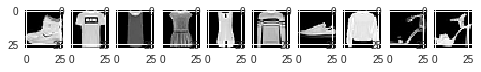

The labels are : 
[9 0 0 3 0 2 7 2 5 5]


In [55]:
from matplotlib import pyplot

for i in range(0, 10):
	pyplot.subplot(1,10,i+1)
	pyplot.imshow(trainX[i],cmap=pyplot.get_cmap('gray'))
# show the plot
pyplot.show()

print('The labels are : ')
print(np.argmax(trainY[0:10],axis=1))

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Add 1st hidden layer
model.add(tf.keras.layers.Dense(200, activation='sigmoid'))

#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(60, activation='sigmoid'))

#Add 4th hidden layer
model.add(tf.keras.layers.Dense(30, activation='sigmoid'))

#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

#Compile the model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model using model.fit()

In [59]:
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=10,
          batch_size=100)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.9528 - acc: 0.6456 - val_loss: 0.9491 - val_acc: 0.6460
Epoch 2/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.9060 - acc: 0.6633 - val_loss: 0.9280 - val_acc: 0.6765
Epoch 3/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.9326 - acc: 0.6479 - val_loss: 0.9479 - val_acc: 0.6529
Epoch 4/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.8880 - acc: 0.6677 - val_loss: 0.8753 - val_acc: 0.6736
Epoch 5/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.8525 - acc: 0.6786 - val_loss: 0.8772 - val_acc: 0.6694
Epoch 6/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.9043 - acc: 0.6535 - val_loss: 0.9619 - val_acc: 0.6558
Epoch 7/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.9009 - acc: 0.6541 - val_loss: 0.

In [60]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_6 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_7 (Dense)              (None, 60)                6060      
_________________________________________________________________
dense_8 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                310       
Total params: 185,300
Trainable params: 185,300
Non-trainable params: 0
_________________________________________________________________


### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [82]:
#Add BatchNormalization in model
from tensorflow.keras.models import Model

layers = [l for l in model.layers]
x = layers[0].output
for i in range(1, len(layers)):
        if i == 1:
            x = tf.keras.layers.BatchNormalization()(x)
        x = layers[i](x)

new_model = Model(inputs=layers[0].input, outputs=x)
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1_input (InputLayer) (None, 28, 28)            0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_v1_18 (B (None, 784)               3136      
_________________________________________________________________
dense_5 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_6 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_7 (Dense)              (None, 60)                6060      
_________________________________________________________________
dense_8 (Dense)              (None, 30)                1830      
__________

### Execute the model

In [85]:
#Compile the model
new_model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
new_model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=10,
          batch_size=100)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 58us/sample - loss: 1.2677 - acc: 0.5440 - val_loss: 0.9684 - val_acc: 0.6188
Epoch 2/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.9305 - acc: 0.6399 - val_loss: 0.8895 - val_acc: 0.6645
Epoch 3/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.8710 - acc: 0.6731 - val_loss: 0.8485 - val_acc: 0.6835
Epoch 4/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.8330 - acc: 0.6918 - val_loss: 0.8164 - val_acc: 0.7052
Epoch 5/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.8076 - acc: 0.7051 - val_loss: 0.7920 - val_acc: 0.7181
Epoch 6/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.7842 - acc: 0.7146 - val_loss: 0.7731 - val_acc: 0.7272
Epoch 7/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.7638 - acc: 0.7236 - val_loss: 0.

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.01)

#Compile the model
new_model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [88]:
new_model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=30,
          batch_size=100)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 57us/sample - loss: 0.6719 - acc: 0.7579 - val_loss: 0.6810 - val_acc: 0.7548
Epoch 2/30
60000/60000 [==============================] - 3s 53us/sample - loss: 0.6663 - acc: 0.7603 - val_loss: 0.6771 - val_acc: 0.7573
Epoch 3/30
60000/60000 [==============================] - 3s 53us/sample - loss: 0.6620 - acc: 0.7615 - val_loss: 0.6733 - val_acc: 0.7577
Epoch 4/30
60000/60000 [==============================] - 3s 53us/sample - loss: 0.6582 - acc: 0.7631 - val_loss: 0.6702 - val_acc: 0.7575
Epoch 5/30
60000/60000 [==============================] - 3s 53us/sample - loss: 0.6549 - acc: 0.7650 - val_loss: 0.6665 - val_acc: 0.7594
Epoch 6/30
60000/60000 [==============================] - 3s 53us/sample - loss: 0.6511 - acc: 0.7653 - val_loss: 0.6627 - val_acc: 0.7617
Epoch 7/30
60000/60000 [==============================] - 3s 53us/sample - loss: 0.6455 - acc: 0.7679 - val_loss: 0.

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
#Initialize Sequential model
nn_model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
nn_model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Add 1st hidden layer
nn_model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

#Add 2nd hidden layer
nn_model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

#Add OUTPUT layer
nn_model.add(tf.keras.layers.Dense(10, activation='softmax'))


In [0]:

#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)


In [0]:
#Compile the model
nn_model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


## Review model

In [93]:
nn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_11 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


### Run the model

In [94]:
nn_model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=30,
          batch_size=50)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 5s 85us/sample - loss: 1.1612 - acc: 0.6644 - val_loss: 0.8138 - val_acc: 0.7308
Epoch 2/30
60000/60000 [==============================] - 5s 81us/sample - loss: 0.7513 - acc: 0.7388 - val_loss: 0.7609 - val_acc: 0.7310
Epoch 3/30
60000/60000 [==============================] - 5s 82us/sample - loss: 0.7249 - acc: 0.7428 - val_loss: 0.7085 - val_acc: 0.7268
Epoch 4/30
60000/60000 [==============================] - 5s 83us/sample - loss: 0.7095 - acc: 0.7434 - val_loss: 0.7295 - val_acc: 0.7159
Epoch 5/30
60000/60000 [==============================] - 5s 82us/sample - loss: 0.7318 - acc: 0.7381 - val_loss: 0.7512 - val_acc: 0.7007
Epoch 6/30
60000/60000 [==============================] - 5s 81us/sample - loss: 0.7200 - acc: 0.7338 - val_loss: 0.7593 - val_acc: 0.7196
Epoch 7/30
60000/60000 [==============================] - 5s 81us/sample - loss: 0.7410 - acc: 0.7270 - val_loss: 0.